# Zad 1.
Wygeneruj dane 2d w kształcie równoległoboku. Wykonaj ICA i narysuj wszystkie komponenty (bazę i odzyskane sygnały)

http://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_vs_pca.html.

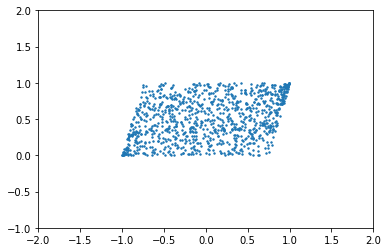

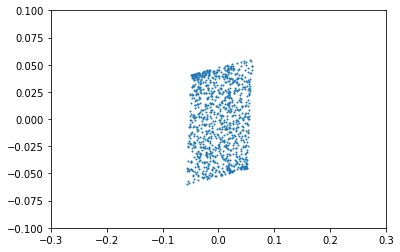

[[ -8.14758563  30.55514439]
 [-31.44743395   3.32549215]]


In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

S = []
for i in range(1000):
    x = 2 * np.random.random() - 1
    if x >= -0.75 and x <= 0.75:
        S.append([x, np.random.random()])
    if x < -3/4:
        S.append([x, (4*(x+1)) * np.random.random()])
    if x > 3/4:
        tmp = (4*(x - 3/4))
        S.append([x, (1 - tmp) * np.random.random() + tmp])

S = np.array(S)
plt.scatter(S[:, 0], S[:, 1], s=2, marker='o')
plt.xlim(-2, 2)
plt.ylim(-1, 2)
plt.show()

S /= S.std(axis=0)
ica = FastICA()
Sica = ica.fit_transform(S).T
plt.scatter(Sica[0], Sica[1], s=1, marker='o')
plt.xlim(-0.3, 0.3)
plt.ylim(-0.1, 0.1)
plt.show()

print(ica.mixing_)

# Zad 2.
Wygeneruj dwa sygnały typu sinus oraz stwórz dane za pomocą macierzy mieszającej [1/2,1/2;-1/2,1/2].
Wykonaj ICA i odzyskaj oryginalne dane.

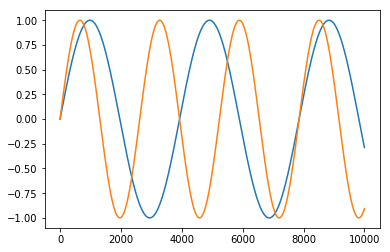

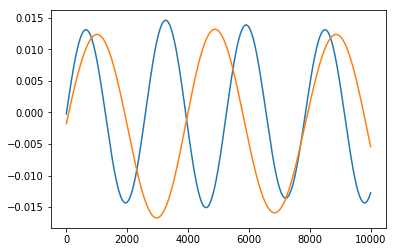

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA

x = np.linspace(0, 8, 10000)
y1 = np.sin(2 * x)
y2 = np.sin(3 * x)
X = np.c_[y1, y2]
plt.plot(X)
plt.show()

X /= X.std(axis=0)
A = np.array([[1/2, 1/2], [-1/2, 1/2]])
X = np.dot(X, A.T)

ica = FastICA()
Xica = ica.fit_transform(X)
plt.plot(Xica)
plt.show()

# Zad 3.
Wybierz dwa obrazki. Dokonaj mieszania obrazów (dodaj je od siebie i odejmij). Wykonaj ICA i odzyskaj oryginalne dane.

![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/eagle.jpg)
![alt](https://raw.githubusercontent.com/przem85/PGiM/master/img/lake.jpg)

c:\users\xxx\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
c:\users\xxx\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys


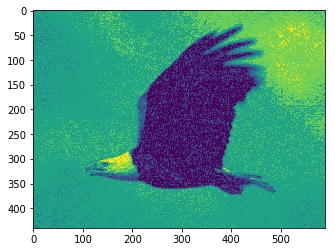

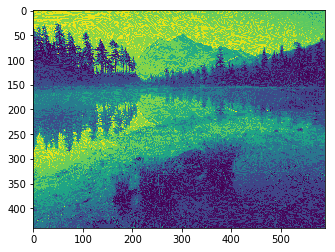

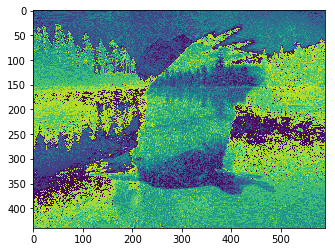

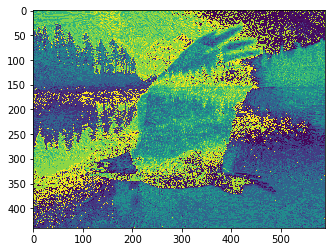

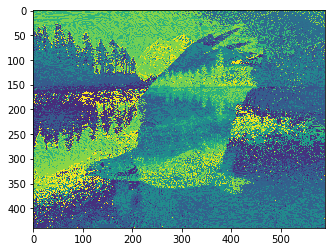

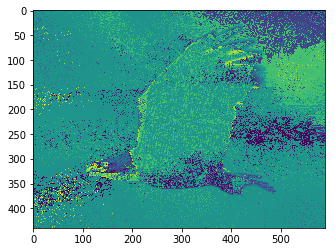

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.ndimage import imread

im1 = imread('eagle.jpg', mode="P")
im2 = imread('lake.jpg', mode="P")

plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

X = np.c_[(im1 + im2).flatten(), (im1 - im2).flatten()]

plt.imshow(X[:, 0].reshape((440, 590)))
plt.show()
plt.imshow(X[:, 1].reshape((440, 590)))
plt.show()

ica = FastICA()
ica.fit(X)
S_ = ica.transform(X)

plt.imshow(S_[:, 0].reshape((440, 590)))
plt.show()
plt.imshow(S_[:, 1].reshape((440, 590)))
plt.show()

c:\users\xxx\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
c:\users\xxx\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  


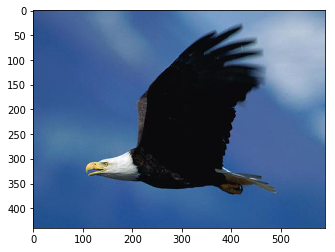

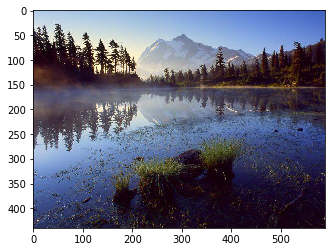

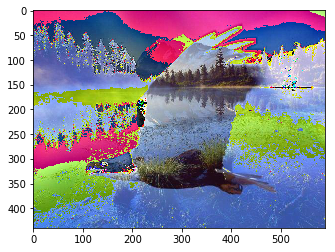

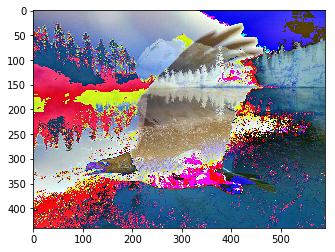

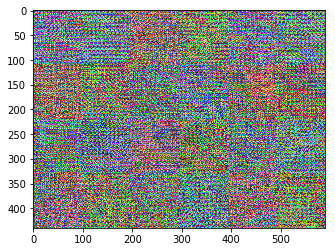

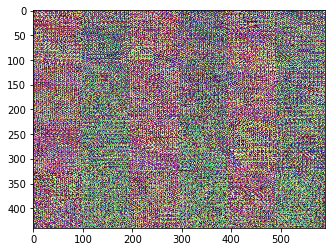

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA
from scipy.ndimage import imread
from PIL import Image

im1 = imread('eagle.jpg', mode="RGB")
im2 = imread('lake.jpg', mode="RGB")

plt.imshow(im1)
plt.show()
plt.imshow(im2)
plt.show()

X = np.c_[(im1 + im2).flatten(), (im1 - im2).flatten()]

plt.imshow(X[:, 0].reshape((440, 590, 3)))
plt.show()
plt.imshow(X[:, 1].reshape((440, 590, 3)))
plt.show()

ica = FastICA()
ica.fit(X)
S_ = ica.transform(X)
plt.imshow(Image.fromarray(S_[:, 0].reshape((440, 590, 3)), 'RGB'))
plt.show()
plt.imshow(Image.fromarray(S_[:, 1].reshape((440, 590, 3)), 'RGB'))
plt.show()

# Zad 4.
Wybierz dwa dźwięki np. 
  * http://ww2.ii.uj.edu.pl/~spurek/ICA/source1.wav
  * http://ww2.ii.uj.edu.pl/~spurek/ICA/source2.wav
  * http://ww2.ii.uj.edu.pl/~spurek/ICA/source3.wav
  * http://ww2.ii.uj.edu.pl/~spurek/ICA/source4.wav 
  * http://ww2.ii.uj.edu.pl/~spurek/ICA/source5.wav 
  * http://ww2.ii.uj.edu.pl/~spurek/ICA/source6.wav   
  * http://ww2.ii.uj.edu.pl/~spurek/ICA/source7.wav
  * http://ww2.ii.uj.edu.pl/~spurek/ICA/source8.wav
  
Dokonaj mieszania dźwięku (dodaj je od siebie i odejmij). Wykonaj ICA i odzyskaj oryginalne dane.

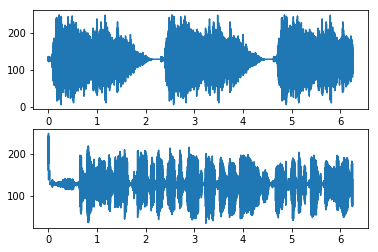

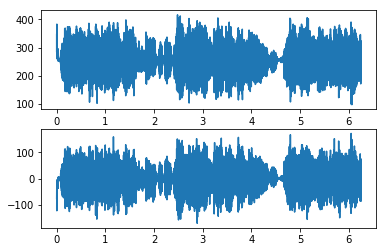

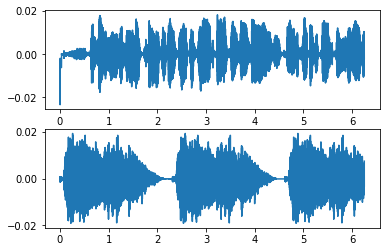

In [17]:
voice_2 = voice_2[:m]

plt.subplot(2, 1, 1)
plt.plot(np.arange(m)/fs_1, voice_1)
plt.subplot(2, 1, 2)
plt.plot(np.arange(m)/fs_2, voice_2)
plt.show()

voice = np.c_[voice_1, voice_2]
A = np.array([[1, 1], [1, -1]])
X = np.dot(voice, A)

plt.subplot(2, 1, 1)
plt.plot(np.arange(m)/fs_1, X[:, 0])
plt.subplot(2, 1, 2)
plt.plot(np.arange(m)/fs_2, X[:, 1])
plt.show()

ica = FastICA()
ica.fit(X)
S_ = ica.transform(X)

plt.subplot(2, 1, 1)
plt.plot(np.arange(m)/fs_1, S_[:, 0])
plt.subplot(2, 1, 2)
plt.plot(np.arange(m)/fs_2, S_[:, 1])

plt.show()